# [E-08] News Summarization Bot
"Exploration Node 8. Making News Summarization Bot" / 2022. 02. 08(Tue) 이형주

## Contents
---
- **1. Data Load and Model Import**
- **2. Data Pre-Processing**
- **3. Model Planning & Training**
- **4. Model Evaluation**
- **5. Extractive Summarization**
- **프로젝트 회고**


## Rubric 평가기준
---

|  평가문항  |  상세기준  |
|:---------|:---------|
|1. Abstractive 모델 구성을 위한 텍스트 전처리 단계가 체계적으로 진행되었다.|분석단계, 정제단계, 정규화와 불용어 제거, 데이터셋 분리, 인코딩 과정이 빠짐없이 체계적으로 진행되었다.
|2. 텍스트 요약모델이 성공적으로 학습되었음을 확인하였다.|모델학습이 안정적으로 수렴되었음을 그래프를 통해 확인하였으며, 실제 요약문과 유사한 요약문장을 얻을 수 있었다.
|3. Extractive 요약을 시도해 보고 Abstractive 요약 결과과 함께 비교해 보았다.|두 요약 결과를 문법완성도 측면과 핵심단어 포함 측면으로 나누어 비교분석 결과를 제시하였다.

## 1. Data Load and Model Import

In [2]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

#data head
data.head()

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [4]:
#total data length
print('total data length :', len(data))

#unique headlines
##Source: hts://jaaamj.tistory.com/112
print('unique headlines:', data.headlines.nunique())

#unique texts
print('unique texts:', data.text.nunique())

total data length : 98401
unique headlines: 98280
unique texts: 98360


## 2. Data Pre-Processing

In [5]:
# 1. Remove duplicated data
data.drop_duplicates(subset=['text'], inplace = True)
print('total data length :', len(data))
print('unique headlines:', data.headlines.nunique())

# 2. Text Normalization
##Source: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("Num.Norm.dic: ",len(contractions))

# 3. Checking 'Null'
## Null 값은 확인되는게 없음
print(data.isnull().sum())

# 4. Stopwords
print('Num.StopWords :', len(stopwords.words('english') ))
print(stopwords.words('english'))

# 5. Data Pre-Processing Formula
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, "lxml").text 
    sentence = re.sub(r'\([^)]*\)', '', sentence) 
    sentence = re.sub('"','', sentence) 
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
    sentence = re.sub(r"'s\b","",sentence)
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    sentence = re.sub('[m]{2,}', 'mm', sentence) 
    
    # Remove StopWords (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # Don't Remove StopWords (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

total data length : 98360
unique headlines: 98262
Num.Norm.dic:  120
headlines    0
text         0
dtype: int64
Num.StopWords : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all

In [6]:
# 6. Pre-Processing for all 'Text' Data
clean_text = []

for s in data['text']:
    clean_text.append(preprocess_sentence(s))

clean_text[:5]

['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers',
 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit',
 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history',
 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical il

In [7]:
# 7. Pre-Processing for all 'Summary' Data
clean_summary = []

for s in data['headlines']:
    clean_summary.append(preprocess_sentence(s, False))

clean_summary[:5]

['upgrad learner switches to career in ml al with salary hike',
 'delhi techie wins free food from swiggy for one year on cred',
 'new zealand end rohit sharma led india match winning streak',
 'aegon life iterm insurance plan helps customers save tax',
 'have known hirani for yrs what if metoo claims are not true sonam']

In [8]:
# 8. Removes all empty state to 'Null'
data['Text'] = clean_text
data['Summary'] = clean_summary

data.replace('', np.nan, inplace=True)

Minimum Length of Text : 1
Maximum Length of Text : 91
Average Length of Text : 58.23813542090281
Minimum Length of Headlines : 1
Maximum Length of Headlines : 18
Average Length of Headlines : 9.553660024400163


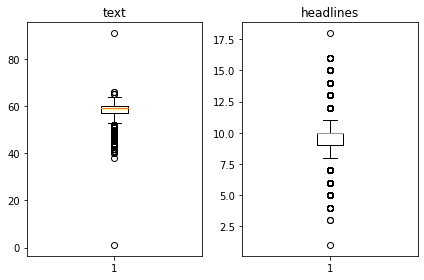

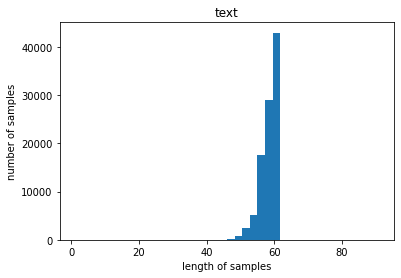

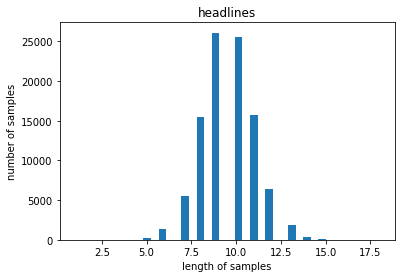

In [9]:
# 9. Checking Data Distributions 
#    after Stopword and Normalization Process

import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headline_len = [len(s.split()) for s in data['headlines']]

print('Minimum Length of Text : {}'.format(np.min(text_len)))
print('Maximum Length of Text : {}'.format(np.max(text_len)))
print('Average Length of Text : {}'.format(np.mean(text_len)))
print('Minimum Length of Headlines : {}'.format(np.min(headline_len)))
print('Maximum Length of Headlines : {}'.format(np.max(headline_len)))
print('Average Length of Headlines : {}'.format(np.mean(headline_len)))

plt.subplot(1, 2, 1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1, 2, 2)
plt.boxplot(headline_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headline_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [10]:
# 10. Limits max_len
## text_max_len -> 65
## headline_max_len = 12

text_max_len = 65
headline_max_len = 12

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt+1
    print('Ratio of Samples less then %s of Samples Length: %s'%(max_len, (cnt/len(nested_list))))

In [11]:
# 11. Checking Data Loss of Samples (Text, Headlines)
## Text -> Less than 0.01% of Loss
## Headlines -> Less than 0.24% of Loss
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headline_max_len, data['headlines'])

Ratio of Samples less then 65 of Samples Length: 0.9999694997966653
Ratio of Samples less then 12 of Samples Length: 0.9768198454656364


In [13]:
# 12. Adds Start - End Tokens on Decoder

data['decoder_input']=data['headlines'].apply(lambda x:'sostoken '+x)
data['decoder_target']=data['headlines'].apply(lambda x:x+' eostoken')
data.head()

,headlines,text,Text,Summary,decoder_input,decoder_target
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...,sostoken upGrad learner switches to career in ...,upGrad learner switches to career in ML & Al w...
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...,sostoken Delhi techie wins free food from Swig...,Delhi techie wins free food from Swiggy for on...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken New Zealand end Rohit Sharma-led Indi...,New Zealand end Rohit Sharma-led India's 12-ma...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer...",aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken Aegon life iTerm insurance plan helps...,Aegon life iTerm insurance plan helps customer...
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...,"sostoken Have known Hirani for yrs, what if Me...","Have known Hirani for yrs, what if MeToo claim..."


In [14]:
## 13. Save results as numpy
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [15]:
## 14. Distinguishing Training and Test Set
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
### random.shuffle - nxdarray or MutableSequence
print(indices)

## Shuffling Data Sample Numbers
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

print('Num. of Training Labels:', len(encoder_input))
print('Num. of Test Labels', len(decoder_input))

## Data Distribution Ratio: Training 8 Test 2
n_of_val = int(len(encoder_input)*0.2)
print('Num. of Test Set :', n_of_val) 
### n_of_val = test_size (sklearn)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('Num. Training Data :', len(encoder_input_train))
print('Num. Training Labels :', len(decoder_input_train))
print('Num. Test Data :', len(encoder_input_test))
print('Num. Test Labels :', len(decoder_input_test))

## 15. Tokenization
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

[ 6822 96872 92858 ... 17877 97197 93883]
Num. of Training Labels: 98360
Num. of Test Labels 98360
Num. of Test Set : 19672
Num. Training Data : 78688
Num. Training Labels : 78688
Num. Test Data : 19672
Num. Test Labels : 19672


In [18]:
## 16. rare_freq/total_freq = 2.44% LESS THAN 6 TIMES

threshold = 6
total_cnt = len(src_tokenizer.word_index)
rare_cnt = 0   
total_freq = 0
rare_freq = 0
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(voacabulary)의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold-1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt-rare_cnt))
print('단어 집합에서 희귀 단어의 비율:',(rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq/total_freq)*100)

단어 집합(voacabulary)의 크기: 91302
등장 빈도가 5번 이하인 희귀 단어의 수: 64333
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 26969
단어 집합에서 희귀 단어의 비율: 70.46176425489037
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.4460928728396363


In [19]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

# BEFORE (78,688) = :(
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))

# src_tokenizer 생성 정수변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# AFTER (78,688) - :D
print(encoder_input_train[:3])
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
[[1243, 966, 4577, 13232, 97, 5, 1, 168, 631, 2, 1, 97, 5, 1, 168, 631, 257, 15, 277, 2710, 9, 2246, 39, 1759, 3, 314, 22, 1, 302, 3800, 4, 2860, 6065, 1, 53, 3963, 1243, 139, 630, 2209, 184, 2710, 9808, 22, 243, 84, 1, 302, 942, 204, 3233, 9808, 4, 1, 5931, 143], [341, 2012, 106, 8373, 445, 7406, 11830, 8, 10, 11, 1, 309, 592, 893, 6136, 77, 82, 194, 4950, 1051, 2, 5484, 11, 24, 3110, 591, 294, 64, 272, 2, 4445, 1295, 7, 37, 2640, 35, 119, 18, 3869, 90, 6002, 14076, 6, 10199, 8631, 341, 6, 4799, 45, 3511, 4, 1, 386, 9, 3886, 272, 2, 1253, 3344, 1323], [1986, 3111, 28, 418, 1, 47, 690, 2, 916, 134, 67, 378, 4, 1640, 196, 7, 122, 2312, 17, 4128, 48, 589, 4538, 15, 714, 3, 3187, 3111, 2600, 3, 212, 167, 524, 2, 916, 17, 47, 4128, 5, 557, 218, 6, 410, 222, 7, 17, 8632, 133, 714, 1, 956, 7033, 4098, 7, 17, 2048]]
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688


In [20]:
## 17. Headlines Data

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

threshold = 6
total_cnt = len(tar_tokenizer.word_index) 
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 


for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40738
등장 빈도가 5번 이하인 희귀 단어의 수: 29415
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11323
단어 집합에서 희귀 단어의 비율: 72.20531199371594
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.122880609115584


In [21]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

## decoder_input에는 Start, End Token이 존재함. 따라서 문장 길이가 1이 되는 경우도 발생함.
## 문장의 길이가 1인 것들을 정제(삭제) 처리

input
input  [[1, 559, 2228, 7698, 962, 461, 3, 6203, 962, 13, 5465], [1, 229, 9399, 776, 262, 225, 447, 3945, 1848, 110], [1, 77, 1967, 1780, 41, 264, 8, 2801], [1, 63, 543, 3, 72, 78, 158, 3, 8, 214, 3229], [1, 1598, 3, 5466, 45, 5102, 1233, 3, 2259]]
target
decoder  [[559, 2228, 7698, 962, 461, 3, 6203, 962, 13, 5465, 2], [229, 9399, 776, 262, 225, 447, 3945, 1848, 110, 2], [77, 1967, 1780, 41, 264, 8, 2801, 2], [63, 543, 3, 72, 78, 158, 3, 8, 214, 3229, 2], [1598, 3, 5466, 45, 5102, 1233, 3, 2259, 2]]


In [22]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('Num. Training Data to remove :',len(drop_train))
print('Num. Test Data to remove :',len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('Num. Training Data :', len(encoder_input_train))
print('Num. Training Labels :',len(decoder_input_train))
print('Num. Test Data :',len(encoder_input_test))
print('Num. Test Labels :',len(decoder_input_test))

Num. Training Data to remove : 0
Num. Test Data to remove : 0
Num. Training Data : 78688
Num. Training Labels : 78688
Num. Test Data : 19672
Num. Test Labels : 19672


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [23]:
## 18. Padding

encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = headline_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = headline_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = headline_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = headline_max_len, padding='post')

## 3. Model Planning & Training

In [24]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Encoder Planning
embedding_dim = 128
hidden_size = 256
# Encoder
encoder_inputs = Input(shape=(text_max_len,))
# Embedding Layer
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
# LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
# LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [30]:
# Decoder Planning
decoder_inputs = Input(shape=(None,))

# Embedding Layer
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

# Softmax layer
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# def
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 65)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 65, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 65, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [31]:
from tensorflow.keras.layers import AdditiveAttention

# Attention Layer
attn_layer = AdditiveAttention(name='attention_layer')

# time step의 hidden state를 어텐션 층에 전달
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# def
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 65)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 65, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 65, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

Epoch 1/10
77/77 [==============================] - 93s 1s/step - loss: 2.6453 - val_loss: 3.6554
Epoch 2/10
77/77 [==============================] - 85s 1s/step - loss: 2.5425 - val_loss: 3.6404
Epoch 3/10
77/77 [==============================] - 85s 1s/step - loss: 2.4777 - val_loss: 3.6371
Epoch 4/10
77/77 [==============================] - 84s 1s/step - loss: 2.4222 - val_loss: 3.6422
Epoch 5/10
77/77 [==============================] - 85s 1s/step - loss: 2.3769 - val_loss: 3.6380
Epoch 00005: early stopping


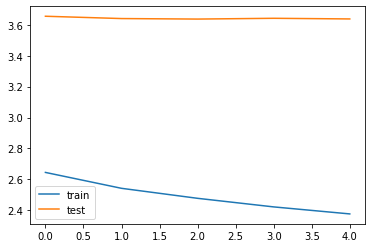

In [44]:
#batch_size 1024
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=1024, callbacks=[es], epochs=10)


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Epoch 1/10
154/154 [==============================] - 151s 930ms/step - loss: 2.4149 - val_loss: 3.6504
Epoch 2/10
154/154 [==============================] - 142s 921ms/step - loss: 2.3676 - val_loss: 3.6536
Epoch 3/10
154/154 [==============================] - 142s 924ms/step - loss: 2.3345 - val_loss: 3.6512
Epoch 00003: early stopping


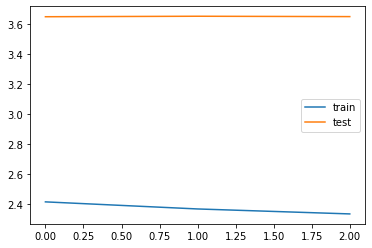

In [45]:
#batch_size 512
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=512, callbacks=[es], epochs=10)


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 4. Model Evaluation

In [46]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [47]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [49]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [56]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [57]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [58]:
# Test Set 결과 출력
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : jet airways has postponed its june quarter results to an unspecified late date after its audit committee did not recommend the results to the board for approval the company's shares fell as much as 14 5 on friday hitting a three year low the announcement comes just days after the airline denied reports that said it was running out of money 
실제 요약 : jet airways delays earnings report shares hit 3 year low 
예측 요약 :  jet airways jet airways jet airways jet airways jet airways


원문 : sourav ganguly called ms dhoni's offer to lead the team during the final test of his career a surprise gesture and said he had initially rejected it i'd rejected his offer earlier in the day but couldn't refuse a second time ganguly wrote in his book ganguly added he told dhoni to captain after three overs as he couldn't focus 
실제 요약 : first rejected dhoni's offer to lead in final test ganguly 
예측 요약 :  dhoni is the best captain steve smith on dhoni's test


원문 : e scooter startup bird has apologised for 

## 5. Extractive Summarization

In [60]:
import requests
from summa.summarizer import summarize

#test_01
text_str = data['text'][50]
print(summarize(text_str, ratio=0.8))


#test_02 (ratio 0.5)
text_str = data['text'][50]
print(summarize(text_str, ratio=0.5))


#test_03
text_str = data['text'][100]
print(summarize(text_str, ratio=0.8))


#test_04 (ratio 0.5)
text_str = data['text'][100]
print(summarize(text_str, ratio=0.5))


#test_05
text_str = data['text'][200]
print(summarize(text_str, ratio=0.8))


#test_06 (ratio 0.5)
text_str = data['text'][200]
print(summarize(text_str, ratio=0.5))

Former Finance Minister Yashwant Sinha on Tuesday demanded a probe into the alleged diversion of loans worth Ã¢ÂÂ¹31,000 crore by Dewan Housing Finance (DHFL).
This comes after a media report on Tuesday accused DHFL's controlling shareholders of diverting funds to shell companies to buy assets.
Former Finance Minister Yashwant Sinha on Tuesday demanded a probe into the alleged diversion of loans worth Ã¢ÂÂ¹31,000 crore by Dewan Housing Finance (DHFL).
German multinational engineering and electronics firm Bosch has made its first investment in India in Bengaluru-based deep-tech startup SimYog. SimYog has raised about Ã¢ÂÂ¹6.3 crore in the funding round, with participation from early-stage venture capital firm Ideaspring Capital.
German multinational engineering and electronics firm Bosch has made its first investment in India in Bengaluru-based deep-tech startup SimYog. SimYog has raised about Ã¢ÂÂ¹6.3 crore in the funding round, with participation from early-stage venture capital f

## 프로젝트 회고

+ batch size를 64, 256, 512, 1024 등 다양한 방법으로 연속 실험하여 Early Stopped 되었고, 그래프가 완만하게 표시된 문제가 확인되나, 실제 결과물에서는 대략적인 문장 의미를 이해할 수 있는 수준까지 요약되었다. (실제로 학습은 더 많이 되었다)
+ Fundamental Node에 더 많은 집중을 하고 있으나, 초반에 Fundamental을 집중하여 학습 수준을 상향 평준화 시키고 각자 전문화를 하고자 하는 영역에 더 집중하는 것이 바람직하지 않을까 생각이 되었다. 남은 시간에 NLP 영역을 더 집중해보고 싶다.
+ Node의 가중치를 더하는 attention 구성 과정과, 시퀀스를 정수 -> 텍스트로 서로 전환하는 과정이 매끄럽지 못하였다. 그래서 코드를 뜯어보는 데에 시간을 다소 할애하였다.
+ numpy array 순서를 np.random.shuffle을 통하여 섞는(indicies) 과정을 새롭게 경험하였다.